In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import math
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

import seaborn as sns
%matplotlib inline
plt.rcParams['font.size'] = 14

In [2]:
def entropy(target):
    # Get the number of users
    n = len(target)
    # Count how frequently each unique value occurs
    counts = np.bincount(target).astype(float)
#     print("hahaha" , counts)
    # Initialize entropy
    entropy = 0
    # If the split is perfect, return 0
    #if bincount result only has a occurrance times of 0s, then the length of counts will be 1, 
    #otherwise, the length of counts will be 2, and the first value of the array is 0
    if len(counts) <= 1 or 0 in counts:
        return entropy
    # Otherwise, for each possible value, update entropy
    for count in counts:
        #math.log() counts the logarithm x to the given base
        #in this case, x is count/n, base is len(counts)!!!!!!!!!!!!!!!!!!!!!!
        entropy += math.log(count/n, len(counts)) * count/n
    # Return entropy
    return -1 * entropy

def information_gain(feature, threshold, target):
    # Dealing with numpy arrays makes this slightly easier
    target = np.array(target)
    feature = np.array(feature)
#     print(feature)
    # Cut the feature vector on the threshold
    #if "<" attribute "True", if else, attribute "False"
    feature = (feature < threshold)
#     print(feature)
    # Initialize information gain with the parent entropy
    ig = entropy(target)
    # For both sides of the threshold, update information gain
    for level, count in zip([0, 1], np.bincount(feature).astype(float)):
#         print (level, count)
        ig -= count/len(feature) * entropy(target[feature == level])
    # Return information gain
    return ig

def best_threshold(one_feature_attribute, Y, name):
    maximum_ig = 0
    maximum_threshold = 0

    for threshold in one_feature_attribute:
        ig = information_gain(one_feature_attribute, threshold, np.array(Y))
        if ig > maximum_ig:
            maximum_ig = ig
            maximum_threshold = threshold

    print("The maximum IG of feature attribute '%s' is %.3f and it occured by splitting on %.4f."\
% (name, maximum_ig, maximum_threshold))
    return maximum_ig


In [3]:
data1 = pd.read_csv("data_1.csv")
data2 = pd.read_csv("data_2.csv")
data3 = pd.read_csv("data_3.csv")

In [4]:
data_total = pd.concat([data1, data2, data3], axis=0)
data_total = data_total.drop(columns=['startDateTime', 'stopDateTime'])  
data_total = shuffle(data_total)  #shuffle the dataframe
data_total

/Users/mac/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Tag,appName,destination,destinationPayloadAsBase64,destinationPayloadAsUTF,destinationPort,destinationTCPFlagsDescription,direction,protocolName,sensorInterfaceId,source,sourcePayloadAsBase64,sourcePayloadAsUTF,sourcePort,sourceTCPFlagsDescription,totalDestinationBytes,totalDestinationPackets,totalSourceBytes,totalSourcePackets
66717,Normal,HTTPWeb,213.155.64.209,SFRUUC8xLjEgMzAxIE1vdmVkIFBlcm1hbmVudGx5DQpEYX...,"HTTP/1.1 301 Moved PermanentlyDate: Tue, 15 Ju...",80,"F,S,R,P,A",L2R,tcp_ip,NaN,192.168.2.112,R0VUIC91cy9hYm91dC11cy9wb2xpY2llcy8/dHJhY2tlZD...,GET /us/about-us/policies/?tracked=&partnerid=...,2334,"F,S,P,A",927,7,836,9
91103,Normal,ICMP,192.168.2.107,NaN,NaN,0,NaN,R2L,icmp_ip,1.0,195.88.72.194,RQAAOrhkAAByEcEgwKgCa8NYSMLiuMjVACZQW0EC1H0tmP...,E:.dr.. ...k.XH.....&P[A..}-..08..E:..r......k...,0,NaN,0,0,208,2
115531,Attack,HTTPWeb,192.168.5.122,SFRUUC8xLjEgMjAwIE9LDQpEYXRlOiBUdWUsIDE1IEp1bi...,"HTTP/1.1 200 OKDate: Tue, 15 Jun 2010 19:57:59...",80,"F,S,P,A",L2L,tcp_ip,NaN,192.168.4.118,R0VUIC8gSFRUUC8xLjENCkhvc3Q6IDE5Mi4xNjguNS4xMj...,GET / HTTP/1.1Host: 192.168.5.122GET / HTTP/1....,3471,"F,S,P,A",163972,210,10055,105
164991,Normal,HTTPImageTransfer,95.211.98.12,NaN,NaN,80,"F,S,P,A",L2R,tcp_ip,NaN,192.168.2.109,NaN,NaN,1703,"F,S,P,A",2807,6,477,6
113238,Attack,HTTPWeb,192.168.5.122,SFRUUC8xLjEgMjAwIE9LDQpEYXRlOiBUdWUsIDE1IEp1bi...,"HTTP/1.1 200 OKDate: Tue, 15 Jun 2010 20:00:06...",80,"F,S,P,A",L2L,tcp_ip,NaN,192.168.2.113,R0VUIC8gSFRUUC8xLjENCkhvc3Q6IDE5Mi4xNjguNS4xMj...,GET / HTTP/1.1Host: 192.168.5.122GET / HTTP/1....,4633,"F,S,P,A",160724,154,7745,63
185515,Normal,HTTPImageTransfer,67.15.255.4,NaN,NaN,80,"F,S,P,A",L2R,tcp_ip,NaN,192.168.3.116,NaN,NaN,3952,"F,S,P,A",2026,6,459,5
37584,Normal,DNS,192.168.5.122,u0eBgAABAAEAAwAAA3d3dwluYW1lZHJpdmUDY29tAAABAA...,".G......wwwnamedrive.com.......,..........("".....",53,NaN,L2L,udp_ip,NaN,192.168.2.107,u0cBAAABAAAAAAAAA3d3dwluYW1lZHJpdmUDY29tAAABAAE=,.G...wwwnamedrive.com..,57700,NaN,302,2,81,1
4026,Normal,HTTPImageTransfer,95.211.98.12,NaN,NaN,80,"F,S,P,A",L2R,tcp_ip,NaN,192.168.2.109,NaN,NaN,1193,"F,S,P,A",1375,5,413,5
14065,Normal,HTTPWeb,67.212.184.66,SFRUUC8xLjEgMjAwIE9LDQpEYXRlOiBXZWQsIDE2IEp1bi...,"HTTP/1.1 200 OKDate: Wed, 16 Jun 2010 01:47:07...",80,"F,S,R,P,A",L2R,tcp_ip,NaN,192.168.4.118,R0VUIC9jYXRlZ29yaWVzLnBocD9jYXRlZ29yeT1TdGFuZH...,GET /categories.php?category=Stands&parent_id=...,4235,"F,S,P,A",33000,27,1464,18
141085,Normal,HTTPWeb,125.53.25.45,SFRUUC8xLjEgMjAwIE9LDQpEYXRlOiBUdWUsIDE1IEp1bi...,"HTTP/1.1 200 OKDate: Tue, 15 Jun 2010 16:37:29...",80,"F,S,P,A",L2R,tcp_ip,NaN,192.168.4.118,R0VUIC8gSFRUUC8xLjENCkhvc3Q6IGtvbm5rYXR1LW5hdm...,GET / HTTP/1.1Host: konnkatu-navi.com,2462,"F,S,P,A",19041,16,807,12


In [5]:
variables_name = data_total.columns.values.tolist()
for i in variables_name:  #change all the NaN in dataframe into 0    
    d1 = data_total[i]
    d1[pd.isnull(data_total[i]) == True] = '0'   #change the NaN into 0    
variables_name.remove('Tag')
# data_total

In [6]:
data_total['sensorInterfaceId'] = data_total['sensorInterfaceId'].astype(str)
data_total = data_total.apply(LabelEncoder().fit_transform)  #transform all the strings into integers or floats

In [7]:
data_attack = data_total[data_total['Tag'] == 0]
data_normal = data_total[data_total['Tag'] == 1]
data_normal = data_normal.sample(n=37460)#random choose 37460 normal packets, which have the number of attack packets

data_adjusted = pd.concat([data_attack, data_normal], axis=0)#we create a dataframe with 1:1 rate of normal and attack
data_adjusted = shuffle(data_adjusted)  #shuffle the dataframe

In [8]:
X = data_adjusted[variables_name]  #we use the adjusted 1:1 rate dataframe to train the model
Y = data_adjusted['Tag']  #target attribute
Y

180518    1
136315    0
156332    0
166428    0
34485     1
29240     1
17015     1
175821    1
180924    1
117447    0
136740    0
113433    1
138902    0
156954    1
150698    0
156257    0
152922    0
108993    0
69146     1
165518    0
123685    0
84872     1
87975     1
79980     1
117269    0
156466    1
121888    0
164066    1
116820    0
151221    1
         ..
116824    0
110412    0
89633     1
125471    0
124077    1
147957    0
66309     1
123748    0
131916    0
151487    0
146861    0
14799     1
177190    1
106577    0
145100    1
129120    0
58727     1
167784    0
33092     1
68140     1
130861    0
53176     1
114287    0
15883     1
112221    0
107962    0
138602    0
125865    0
152139    1
127539    0
Name: Tag, Length: 74920, dtype: int64

In [9]:
information_gain_list = {}
for name in variables_name:
    ig = best_threshold(X[name],Y, name)
    information_gain_list[name] = ig
print(information_gain_list)

The maximum IG of feature attribute 'appName' is 0.321 and it occured by splitting on 15.0000.
The maximum IG of feature attribute 'destination' is 0.598 and it occured by splitting on 5846.0000.
The maximum IG of feature attribute 'destinationPayloadAsBase64' is 0.548 and it occured by splitting on 76929.0000.
The maximum IG of feature attribute 'destinationPayloadAsUTF' is 0.609 and it occured by splitting on 102450.0000.
The maximum IG of feature attribute 'destinationPort' is 0.082 and it occured by splitting on 11.0000.
The maximum IG of feature attribute 'destinationTCPFlagsDescription' is 0.184 and it occured by splitting on 8.0000.
The maximum IG of feature attribute 'direction' is 0.805 and it occured by splitting on 1.0000.
The maximum IG of feature attribute 'protocolName' is 0.127 and it occured by splitting on 4.0000.
The maximum IG of feature attribute 'sensorInterfaceId' is 0.208 and it occured by splitting on 1.0000.
The maximum IG of feature attribute 'source' is 0.089

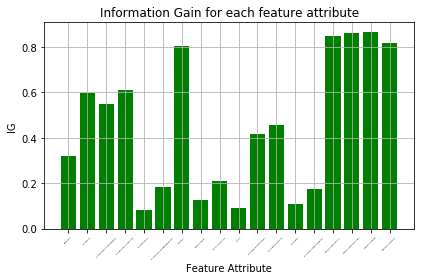

In [10]:
plt.bar(information_gain_list.keys(), information_gain_list.values(), color='g') 
plt.title('Information Gain for each feature attribute')
plt.xlabel('Feature Attribute')
plt.ylabel('IG')
plt.xticks(fontsize=2,rotation=45)
plt.tight_layout()
# 第一个参数是值，第二个参数是对应的显示效果(若无传入则默认直接显示原始数据)，第三个参数是标签旋转角度
plt.grid(True)

plt.savefig('./information_gain.png')

下面这个是画相关性图

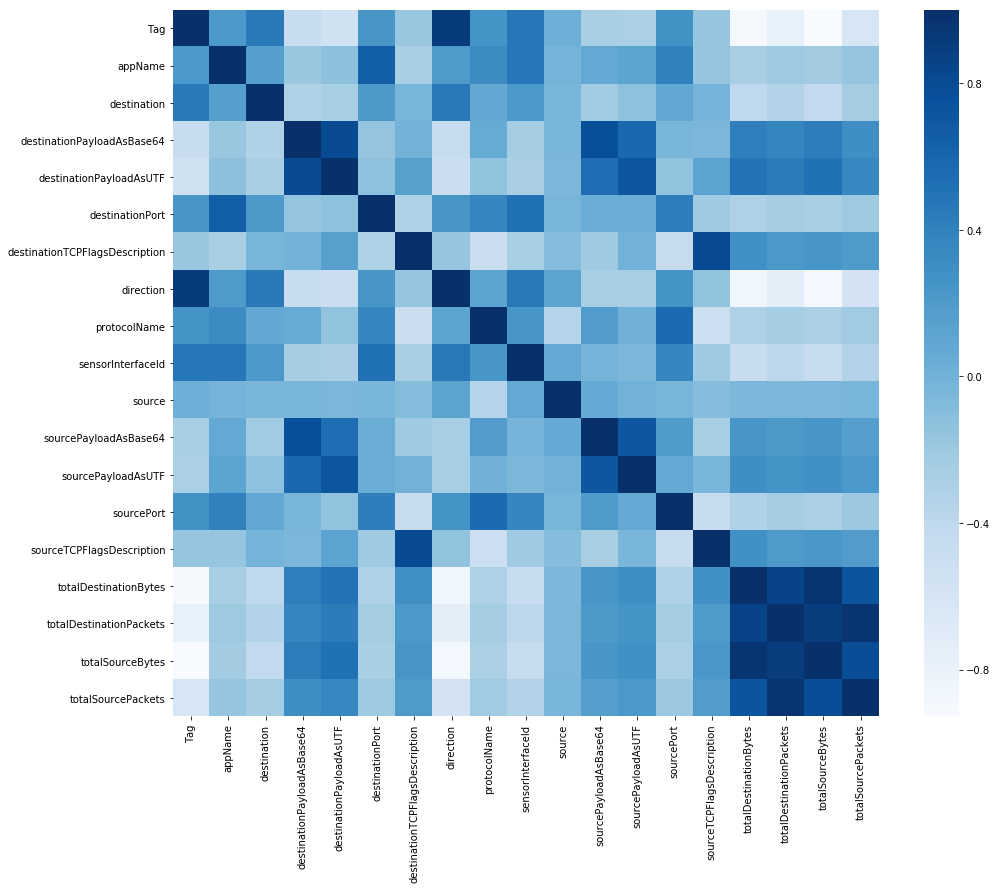

In [11]:
dfData = data_adjusted.corr()
plt.subplots(figsize=(16, 13))  
sns.heatmap(dfData, vmax=1, square=True, cmap="Blues")
plt.savefig('./BluesStateRelation.png')
plt.show()